In [45]:
#! /usr/bin/env python3

import cv2
import numpy as np
from matplotlib import pyplot as plt
import math


def random_gauss(A, r):
    return clip(A + np.random.normal(0, r, A.shape))


def clip(i):
    return np.clip(i, 0, 1)


def random_saltpepper(A, r):
    prob = r / 2
    peppers = np.random.binomial(1, r/2, size=A.shape)
    A = clip(A - peppers)
    salts = np.random.binomial(1, r/2, size=A.shape)
    A = clip(A + salts)
    return clip(A)


def lowpass(A, n):
    filter = 1/(n*n)
    newA = np.array(A, copy=True)
    pad = (n - 1) // 2
    A = np.pad(A, pad, 'edge')
    x, y = A.shape
    for a in range (0, x - n + 1):
        for b in range(0, y - n + 1 ):
            newA[a, b] = np.sum(filter * (submatrix(A, a, b, n)))
    return clip(newA)


def highpass(A, n):
    filter = np.full((n, n), -1/(n*n - 1))
    filter[((n)//2, (n)//2)] = 1
    newA = np.array(A, copy=True)
    pad = (n - 1) // 2
    A = np.pad(A, pad, 'edge')
    x, y = A.shape
    for a in range (0, x - n//2):
        for b in range(0, y - n//2):
            sm = submatrix(A, a, b, n)
            if sm.shape == filter.shape:
                newA[(a, b)] = np.sum(np.multiply(filter, (submatrix(A, a, b, n))))
    return (newA)


def median(A, n):
    filter = np.full((n, n), -1/(n*n - 1))
    filter[((n)//2, (n)//2)] = 1
    newA = np.array(A, copy=True)
    pad = (n - 1) // 2
    A = np.pad(A, pad, 'edge')
    x, y = A.shape
    for a in range (0, x):
        for b in range(0, y):
            sm = submatrix(A, a, b, n)
            if sm.shape == filter.shape:
                newA[(a, b)] = np.median(submatrix(A, a, b, n))
    return clip(newA)

        
def submatrix(matrix, startRow, startCol, size):
    return matrix[startRow:startRow+size,startCol:startCol+size]


print('Reading images')

p = cv2.imread('pattern.pbm',     cv2.IMREAD_GRAYSCALE)/255
m = cv2.imread('messi-gray.tiff', cv2.IMREAD_GRAYSCALE)/255




Reading images


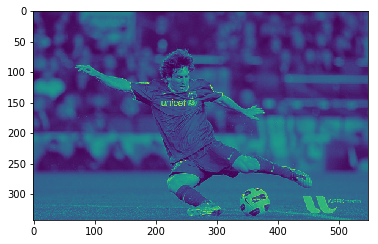

In [536]:
img = np.random.rand(5,5)
kernel = np.array([[-1/8,-1/8,-1/8], [-1/8, 1, -1/8], [-1/8,-1/8,-1/8]])
dst = cv2.filter2D(m,-1,kernel)
cv2.imwrite('tee.jpg', 255*(dst))
plt.imshow((clip(dst) + m) * 255)

# kernel = np.ones((5,5),np.float32)/25
# dst = cv2.filter2D(mg15,-1,kernel)
# print(dst)
# cv2.imwrite('test.jpg', 255*(clip(dst)))
# plt.imshow((clip(dst)) * 255)

True

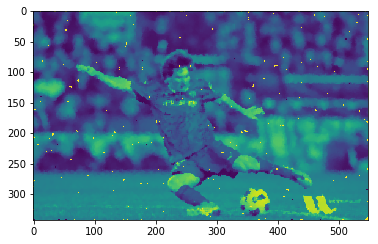

In [529]:

t = median(msp5, 5)
plt.imshow(t * 255)
cv2.imwrite('mh3sp52.jpg', 255*t)


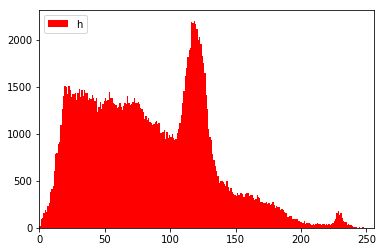

In [570]:
hist, bins = np.histogram((m * 255).flatten(),256,[0,256])
cdf = hist.cumsum()
plt.hist((m* 255).flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('histogram'), loc = 'upper left')
plt.savefig('prenormal.png')



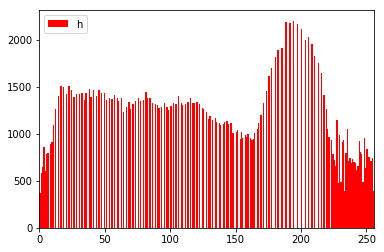

In [569]:
img = cv2.imread('messi-gray.tiff', cv2.IMREAD_GRAYSCALE)
equ = cv2.equalizeHist(img)

hist, bins = np.histogram(equ.flatten(),256,[0,256])
plt.hist((equ).flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('histogram'), loc = 'upper left')
plt.savefig('postnormal.png')
plt.show()

In [571]:
print('Running Messi modifications')

n = random_gauss(m, 0.15)
mg05 = random_gauss(m, 0.05)
mg15 = random_gauss(m, 0.15)
msp1 = random_saltpepper(m, 0.1)
msp5 = random_saltpepper(m, 0.5)
ml3 = lowpass(m, 3)
ml3g05 = lowpass(random_gauss(m, 0.05), 3)
ml3g15 = lowpass(random_gauss(m, 0.15), 3)
ml3sp1 = lowpass(random_saltpepper(m, 0.1), 3)
ml3sp5 = lowpass(random_saltpepper(m, 0.5), 3)
ml5 = lowpass(m, 5)
ml5g05 = lowpass(random_gauss(m, 0.05), 5)
ml5g15 = lowpass(random_gauss(m, 0.15), 5)
ml5sp1 = lowpass(random_saltpepper(m, 0.1), 5)
ml5sp5 = lowpass(random_saltpepper(m, 0.5), 5)
mh3 = highpass(m, 3)
mh3g05 = highpass(random_gauss(m, 0.05), 3)
mh3g15 = highpass(random_gauss(m, 0.15), 3)
mh3sp1 = highpass(random_saltpepper(m, 0.1), 3)
mh3sp5 = highpass(random_saltpepper(m, 0.5), 3)
mh5 = highpass(m, 5)
mh5g05 = highpass(random_gauss(m, 0.05), 5)
mh5g15 = highpass(random_gauss(m, 0.15), 5)
mh5sp1 = highpass(random_saltpepper(m, 0.1), 5)
mh5sp5 = highpass(random_saltpepper(m, 0.5), 5)
mm5 = median(m, 5)
mm5g05 = median(random_gauss(m, 0.05), 5)
mm5g15 = median(random_gauss(m, 0.15), 5)
mm5sp1 = median(random_saltpepper(m, 0.1), 5)
mm5sp5 = median(random_saltpepper(m, 0.5), 5)

mm3 = median(m, 3)
mm3g05 = median(random_gauss(m, 0.05), 3)
mm3g15 = median(random_gauss(m, 0.15), 3)
mm3sp1 = median(random_saltpepper(m, 0.1), 3)
mm3sp5 = median(random_saltpepper(m, 0.5), 3)

print('Running Pattern modifications')

pg05 = clip(random_gauss(p, 0.05))
pg15 = clip(random_gauss(p, 0.15))
psp1 = random_saltpepper(p, 0.1)
psp5 = random_saltpepper(p, 0.5)
pl3 = lowpass(p, 3)
pl3g05 = lowpass(random_gauss(p, 0.05), 3)
pl3g15 = lowpass(random_gauss(p, 0.15), 3)
pl3sp1 = lowpass(random_saltpepper(p, 0.1), 3)
pl3sp5 = lowpass(random_saltpepper(p, 0.5), 3)
pl5 = lowpass(p, 5)
pl5g05 = lowpass(random_gauss(p, 0.05), 5)
pl5g15 = lowpass(random_gauss(p, 0.15), 5)
pl5sp1 = lowpass(random_saltpepper(p, 0.1), 5)
pl5sp5 = lowpass(random_saltpepper(p, 0.5), 5)
ph3 = highpass(p, 3)
ph3g05 = highpass(random_gauss(p, 0.05), 3)
ph3g15 = highpass(random_gauss(p, 0.15), 3)
ph3sp1 = highpass(random_saltpepper(p, 0.1), 3)
ph3sp5 = highpass(random_saltpepper(p, 0.5), 3)
ph5 = highpass(p, 5)
ph5g05 = highpass(random_gauss(p, 0.05), 5)
ph5g15 = highpass(random_gauss(p, 0.15), 5)
ph5sp1 = highpass(random_saltpepper(p, 0.1), 5)
ph5sp5 = highpass(random_saltpepper(p, 0.5), 5)
pm5 = median(p, 5)
pm5g05 = median(random_gauss(p, 0.05), 5)
pm5g15 = median(random_gauss(p, 0.15), 5)
pm5sp1 = median(random_saltpepper(p, 0.1), 5)
pm5sp5 = median(random_saltpepper(p, 0.5), 5)
pm3 = median(p, 3)
pm3g05 = median(random_gauss(p, 0.05), 3)
pm3g15 = median(random_gauss(p, 0.15), 3)
pm3sp1 = median(random_saltpepper(p, 0.1), 3)
pm3sp5 = median(random_saltpepper(p, 0.5), 3)

print('Writing images')

cv2.imwrite('p.jpg',  255*cv2.resize(p, None, fx=20, fy=20,
                                     interpolation=cv2.INTER_AREA))
cv2.imwrite('pg05.jpg',  255*cv2.resize(pg05, None, fx=20, fy=20,
                                     interpolation=cv2.INTER_AREA))
cv2.imwrite('pg15.jpg',  255*cv2.resize(pg15, None, fx=20, fy=20,
                                     interpolation=cv2.INTER_AREA))
cv2.imwrite('psp1.jpg',  255*cv2.resize(psp1, None, fx=20, fy=20,
                                     interpolation=cv2.INTER_AREA))
cv2.imwrite('psp5.jpg',  255*cv2.resize(psp5, None, fx=20, fy=20,
                                     interpolation=cv2.INTER_AREA))
cv2.imwrite('p-l3.jpg',  255*cv2.resize(pl3, None, fx=20, fy=20,
                                     interpolation=cv2.INTER_AREA))
cv2.imwrite('pl3g05.jpg',  255*cv2.resize(pl3g05, None, fx=20, fy=20,
                                     interpolation=cv2.INTER_AREA))
cv2.imwrite('pl3g15.jpg',  255*cv2.resize(pl3g15, None, fx=20, fy=20,
                                     interpolation=cv2.INTER_AREA))
cv2.imwrite('pl3sp1.jpg',  255*cv2.resize(pl3sp1, None, fx=20, fy=20,
                                     interpolation=cv2.INTER_AREA))
cv2.imwrite('pl3sp5.jpg',  255*cv2.resize(pl3sp5, None, fx=20, fy=20,
                                     interpolation=cv2.INTER_AREA))


cv2.imwrite('p-l5.jpg',  255*cv2.resize(pl3, None, fx=20, fy=20,
                                     interpolation=cv2.INTER_AREA))
cv2.imwrite('pl5g05.jpg',  255*cv2.resize(pl5g05, None, fx=20, fy=20,
                                     interpolation=cv2.INTER_AREA))
cv2.imwrite('pl5g15.jpg',  255*cv2.resize(pl5g15, None, fx=20, fy=20,
                                     interpolation=cv2.INTER_AREA))
cv2.imwrite('pl5sp1.jpg',  255*cv2.resize(pl5sp1, None, fx=20, fy=20,
                                     interpolation=cv2.INTER_AREA))
cv2.imwrite('pl5sp5.jpg',  255*cv2.resize(pl5sp5, None, fx=20, fy=20,
                                     interpolation=cv2.INTER_AREA))



cv2.imwrite('ph3.jpg',  255*cv2.resize(ph3, None, fx=20, fy=20,
                                     interpolation=cv2.INTER_AREA))
cv2.imwrite('ph3g05.jpg',  255*cv2.resize(ph3g05, None, fx=20, fy=20,
                                     interpolation=cv2.INTER_AREA))
cv2.imwrite('ph3g15.jpg',  255*cv2.resize(ph3g15, None, fx=20, fy=20,
                                     interpolation=cv2.INTER_AREA))
cv2.imwrite('ph3sp1.jpg',  255*cv2.resize(ph3sp1, None, fx=20, fy=20,
                                     interpolation=cv2.INTER_AREA))
cv2.imwrite('ph3sp5.jpg',  255*cv2.resize(ph3sp5, None, fx=20, fy=20,
                                     interpolation=cv2.INTER_AREA))


cv2.imwrite('ph5.jpg',  255*cv2.resize(ph5, None, fx=20, fy=20,
                                     interpolation=cv2.INTER_AREA))
cv2.imwrite('ph5g05.jpg',  255*cv2.resize(ph5g05, None, fx=20, fy=20,
                                     interpolation=cv2.INTER_AREA))
cv2.imwrite('ph5g15.jpg',  255*cv2.resize(ph5g15, None, fx=20, fy=20,
                                     interpolation=cv2.INTER_AREA))
cv2.imwrite('ph5sp1.jpg',  255*cv2.resize(ph5sp1, None, fx=20, fy=20,
                                     interpolation=cv2.INTER_AREA))
cv2.imwrite('ph5sp5.jpg',  255*cv2.resize(ph5sp5, None, fx=20, fy=20,
                                     interpolation=cv2.INTER_AREA))


cv2.imwrite('pm3.jpg',  255*cv2.resize(pm3, None, fx=20, fy=20,
                                     interpolation=cv2.INTER_AREA))
cv2.imwrite('pm3g05.jpg',  255*cv2.resize(pm3g05, None, fx=20, fy=20,
                                     interpolation=cv2.INTER_AREA))
cv2.imwrite('pm3g15.jpg',  255*cv2.resize(pm3g15, None, fx=20, fy=20,
                                     interpolation=cv2.INTER_AREA))
cv2.imwrite('pm3sp1.jpg',  255*cv2.resize(pm3sp1, None, fx=20, fy=20,
                                     interpolation=cv2.INTER_AREA))
cv2.imwrite('pm3sp5.jpg',  255*cv2.resize(pm3sp5, None, fx=20, fy=20,
                                     interpolation=cv2.INTER_AREA))


cv2.imwrite('pm5.jpg',  255*cv2.resize(pm5, None, fx=20, fy=20,
                                     interpolation=cv2.INTER_AREA))
cv2.imwrite('pm5g05.jpg',  255*cv2.resize(pm5g05, None, fx=20, fy=20,
                                     interpolation=cv2.INTER_AREA))
cv2.imwrite('pm5g15.jpg',  255*cv2.resize(pm5g15, None, fx=20, fy=20,
                                     interpolation=cv2.INTER_AREA))
cv2.imwrite('pm5sp1.jpg',  255*cv2.resize(pm5sp1, None, fx=20, fy=20,
                                     interpolation=cv2.INTER_AREA))
cv2.imwrite('pm5sp5.jpg',  255*cv2.resize(pm5sp5, None, fx=20, fy=20,
                                     interpolation=cv2.INTER_AREA))

cv2.imwrite('m.jpg',  255*m)
cv2.imwrite('mg05.jpg', 255*mg05)
cv2.imwrite('mg15.jpg', 255*mg15)
cv2.imwrite('msp1.jpg', 255*msp1)
cv2.imwrite('msp5.jpg', 255*msp5)
cv2.imwrite('ml3.jpg',  255*ml3)
cv2.imwrite('ml3g05.jpg', 255*ml3g05)
cv2.imwrite('ml3g15.jpg', 255*ml3g15)
cv2.imwrite('ml3sp1.jpg', 255*ml3sp1)
cv2.imwrite('ml3sp5.jpg', 255*ml3sp5)
cv2.imwrite('ml5.jpg',  255*ml5)
cv2.imwrite('ml5g05.jpg', 255*ml5g05)
cv2.imwrite('ml5g15.jpg', 255*ml5g15)
cv2.imwrite('ml5sp1.jpg', 255*ml5sp1)
cv2.imwrite('ml5sp5.jpg', 255*ml5sp5)
cv2.imwrite('mh5.jpg',  255*mh5)
cv2.imwrite('mh5g05.jpg', 255*mh5g05)
cv2.imwrite('mh5g15.jpg', 255*mh5g15)
cv2.imwrite('mh5sp1.jpg', 255*mh5sp1)
cv2.imwrite('mh5sp5.jpg', 255*mh5sp5)
cv2.imwrite('mh3.jpg',  255*mh3)
cv2.imwrite('mh3g05.jpg', 255*mh3g05)
cv2.imwrite('mh3g15.jpg', 255*mh3g15)
cv2.imwrite('mh3sp1.jpg', 255*mh3sp1)
cv2.imwrite('mh3sp5.jpg', 255*mh3sp5)
cv2.imwrite('mm3.jpg',  255*mm3)
cv2.imwrite('mm3g05.jpg', 255*mm3g05)
cv2.imwrite('mm3g15.jpg', 255*mm3g15)
cv2.imwrite('mm3sp1.jpg', 255*mm3sp1)
cv2.imwrite('mm3sp5.jpg', 255*mm3sp5)
cv2.imwrite('mm5.jpg',  255*mm5)
cv2.imwrite('mm5g05.jpg', 255*mm5g05)
cv2.imwrite('mm5g15.jpg', 255*mm5g15)
cv2.imwrite('mm5sp1.jpg', 255*mm5sp1)
cv2.imwrite('mm5sp5.jpg', 255*mm5sp5)


Running Messi modifications
Running Pattern modifications
Writing images


True

In [188]:
str = cv2.imread('strawberries.tiff')

def removecolor(A, R, G, B, d):
    accepted = 0
    AA = np.array(A, copy=True)
    for i in range (len(A)):
        row = A[i]
        for j in range (len(row)):
            (eb, eg, er) = row[j]
            dist = (er - R)**2 + (eg - G)**2 + (eb - B)**2
            if dist > d**2:
                AA[(i, j)] = (0, 0, 0)
            else:
                accepted = accepted + 1
                AA[(i, j)] = (255, 255, 255)
    return (AA, accepted)



[]
10
25
40
55
70
85
100
115
130
145
160
175
190
205
[17, 11227, 35741, 57445, 73990, 88343, 102864, 123676, 141510, 164497, 190571, 242569, 264255, 271216]


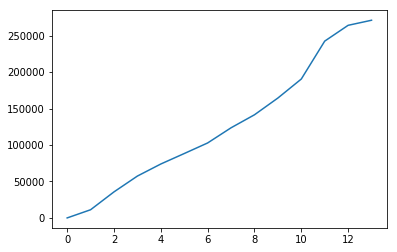

In [149]:

res = []
val = []
print(res)
for i in range(10, 220, 15):
    print(i)
    (a, b) = removecolor(str, 190, 40, 30, i)
    res.append(b)
    val.append(i)
    
print(res)
plt.plot(res)
plt.show()



Text(0.5,1,'Pixels by radius')

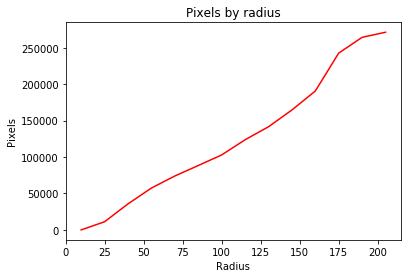

In [153]:

plt.plot(val, res, color='r', label='Red') 
plt.xlabel('Radius')
plt.ylabel('Pixels') 
plt.title('Pixels by radius')

10
0
25
317
40
4011
55
10466
70
20474
85
34745
100
51763
115
84801
130
174835
145
236944
160
259870
175
279291
190
307983
205
337121


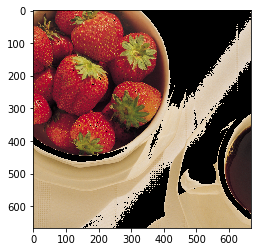

In [165]:

resg = []
valg = []
for i in range(10, 220, 15):
    print(i)
    (a, b) = removecolor(str, 120, 150, 40, i)
    resg.append(b)
    valg.append(i)
    print(b)
    plt.imshow(cv2.cvtColor(a, cv2.COLOR_BGR2RGB))

[0, 317, 4011, 10466, 20474, 34745, 51763, 84801, 174835, 236944, 259870, 279291, 307983, 337121]


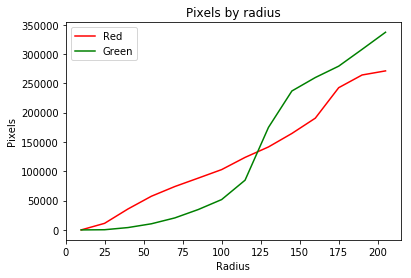

In [169]:
print(resg)
plt.plot(val, res, color='r', label='Red') 
plt.plot(valg, resg, color='g', label='Green') 
plt.xlabel('Radius')
plt.ylabel('Pixels') 
plt.title('Pixels by radius')
plt.legend() 
plt.savefig('redgreen.png')
plt.show()

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


True

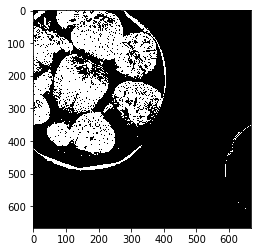

In [211]:
(a, b) = removecolor(str, 120, 150, 40, 70)
(ar, br) = removecolor(str, 190, 40, 30, 70)
image = a + ar
resg.append(b)
valg.append(i)
print(a)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
cv2.imwrite('combine.jpg', image)